In [1]:
%load_ext autoreload

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import lines 
import lib_points as lp
import os

# Compare cases with 5% inlet turbulence for the following domain sizes

The turbulence length scale determined by the filter width is set to $l_t=0.05$ (equivalent to 5% of the axial chord for HPT simulations. The domain width $d$ is determined by $d=f l_t$ such that the following parameter space is spanned 

| $f$ | 3 |4 |6 |8 |
|:----| :------: | :-------: |:-------: |:-------: |
| $d$ | 0.15 | 0.2 | 0.3 |0.4|
|$k$| 24 |32 |48 | 64 |

where $k$ is the number of modes used in the spanwise direction. The domain size set to $1.6 \times 0.4 \times d$ and in order to obtain a similar resolution as in the inlet region of the HiPSTAR HPT LES of the vane the number of points in each direction is set to $512 \times 128 \times 2 \left(k+1\right)$ resulting in a spacing in each direction of approximatly: 


In [5]:
1.6/float(512)

0.003125

## Statistical Convergence

The statistical convergence for the various cases is examined in the following notebooks for the following cases

| $f$ | label in plots| subfolder | notebook| selected intervall |
|:--- |:---------:|:--------  | :-------| --------:|
| 3 |$d=3 l_t$|50_dom015  | [convergence](50_dom015_ti6_5.ipynb)|50000-210000 |
| 4 |$d=4 l_t$|51_dom02  | [convergence](51_dom02_ti6_5.ipynb)| 50000-160000|
| 6 |$d=6 l_t$|52_dom03  | [convergence](52_dom03_ti6_5.ipynb)| 60000-135000 (check convergence for longer)|
| 8 |$d=8 l_t$|50_dom04  | [convergence](53_dom04_ti6_5.ipynb)|56000-126000 |

In [6]:
cd ~/drive2/HPT/INLET_TURB_ONLY/

/media/drive2/HPT/INLET_TURB_ONLY


In [19]:
case=['50_dom015/','51_dom02/','52_dom02/','53_dom04/']
intervall=['50000_to_210000','50000_to_160000','60000_to_135000','56000_to_126000']
n_cases=len(case)
labels=['$d=3 l_t$','$d=4 l_t$','$d=6 l_t$','$d=8 l_t$']

In [20]:
domain_study=lines.lines()
for i in range(n_cases):
    domain_study.extr_ijdata(1,ibeg=1,iend=512,jbeg=64,jend=64,
                             filename='%s/convergence/%s/STAT_cont.bin'%(case[i],intervall[i]),force_read=True,
                            save='Overwrite',label=labels[i])

extract line from (i,j) 1 64  to  512 64  in block  1 512
extract line from (i,j) 1 64  to  512 64  in block  1 512
extract line from (i,j) 1 64  to  512 64  in block  1 512
extract line from (i,j) 1 64  to  512 64  in block  1 512


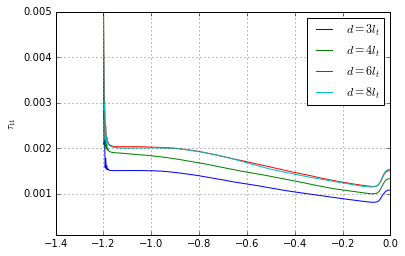

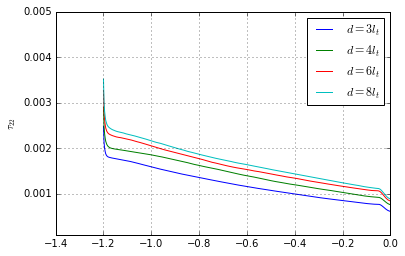

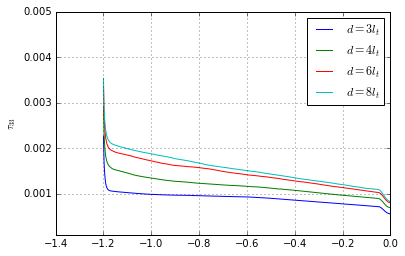

In [21]:
idy=[]
idy.append(domain_study.l[2].var.get_index(101,10))
idy.append(domain_study.l[2].var.get_index(101,12))
idy.append(domain_study.l[2].var.get_index(101,13))

for i in idy:
    plt.figure()
    for l in range(domain_study.num_lines):
        plt.plot(domain_study.l[l].data[:,0],-domain_study.l[l].data[:,i],label=domain_study.label[l])
    plt.legend()
    plt.grid()
    plt.ylim([0.0001,0.005])
    plt.ylabel(domain_study.l[0].var.vars[i])

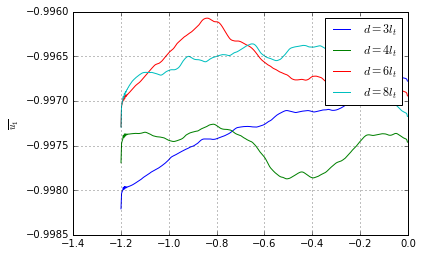

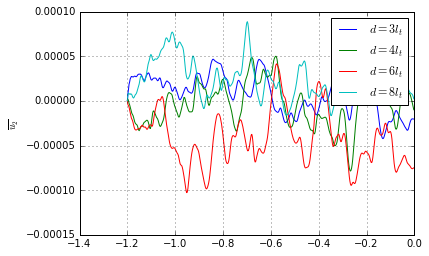

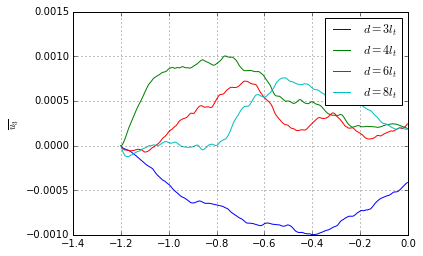

In [23]:
idy=[]
idy.append(domain_study.l[2].var.get_index(102,1))
idy.append(domain_study.l[2].var.get_index(102,2))
idy.append(domain_study.l[2].var.get_index(102,7))

for i in idy:
    plt.figure()
    for l in range(domain_study.num_lines):
        plt.plot(domain_study.l[l].data[:,0],-domain_study.l[l].data[:,i],label=domain_study.label[l])
    plt.legend()
    plt.grid()
    #plt.ylim([0.0001,0.005])
    plt.ylabel(domain_study.l[0].var.vars[i])

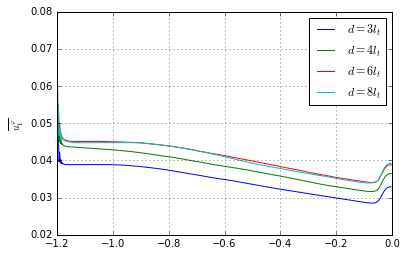

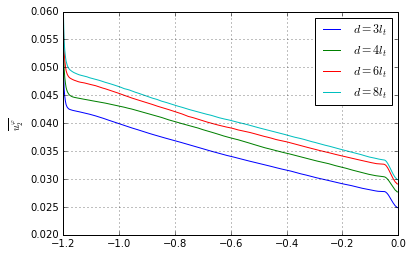

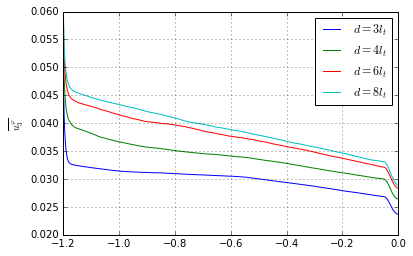

In [32]:
idy=[]
idy.append(domain_study.l[2].var.get_index(102,5))
idy.append(domain_study.l[2].var.get_index(102,6))
idy.append(domain_study.l[2].var.get_index(102,8))

for i in idy:
    plt.figure()
    l=0
    for l in range(domain_study.num_lines):
        plt.plot(domain_study.l[l].data[:,0],domain_study.l[l].data[:,i],label=domain_study.label[l])
    plt.legend()
    plt.grid()
    plt.xlim([-1.2,0.])
    plt.ylabel(domain_study.l[0].var.vars[i])